<a href="https://colab.research.google.com/github/Developper85/parkinson_disease_progression/blob/main/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ce travail peut contribuer à fournir des renseignements importants sur les molécules qui changent à mesure que la maladie de Parkinson progresse.
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c amp-parkinsons-disease-progression-prediction

 93% 15.0M/16.1M [00:00<00:00, 155MB/s]
100% 16.1M/16.1M [00:00<00:00, 160MB/s]


In [ ]:
! unzip amp-parkinsons-disease-progression-prediction.zip

Archive:  amp-parkinsons-disease-progression-prediction.zip
  inflating: amp_pd_peptide/__init__.py  
  inflating: amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: example_test_files/test_peptides.csv  
  inflating: example_test_files/test_proteins.csv  
  inflating: public_timeseries_testing_util.py  
  inflating: supplemental_clinical_data.csv  
  inflating: train_clinical_data.csv  
  inflating: train_peptides.csv      
  inflating: train_proteins.csv      


<h1 align="right"><font color="silver"><b>Parkinson's Disease Progression
Prediction</b></font></h1>


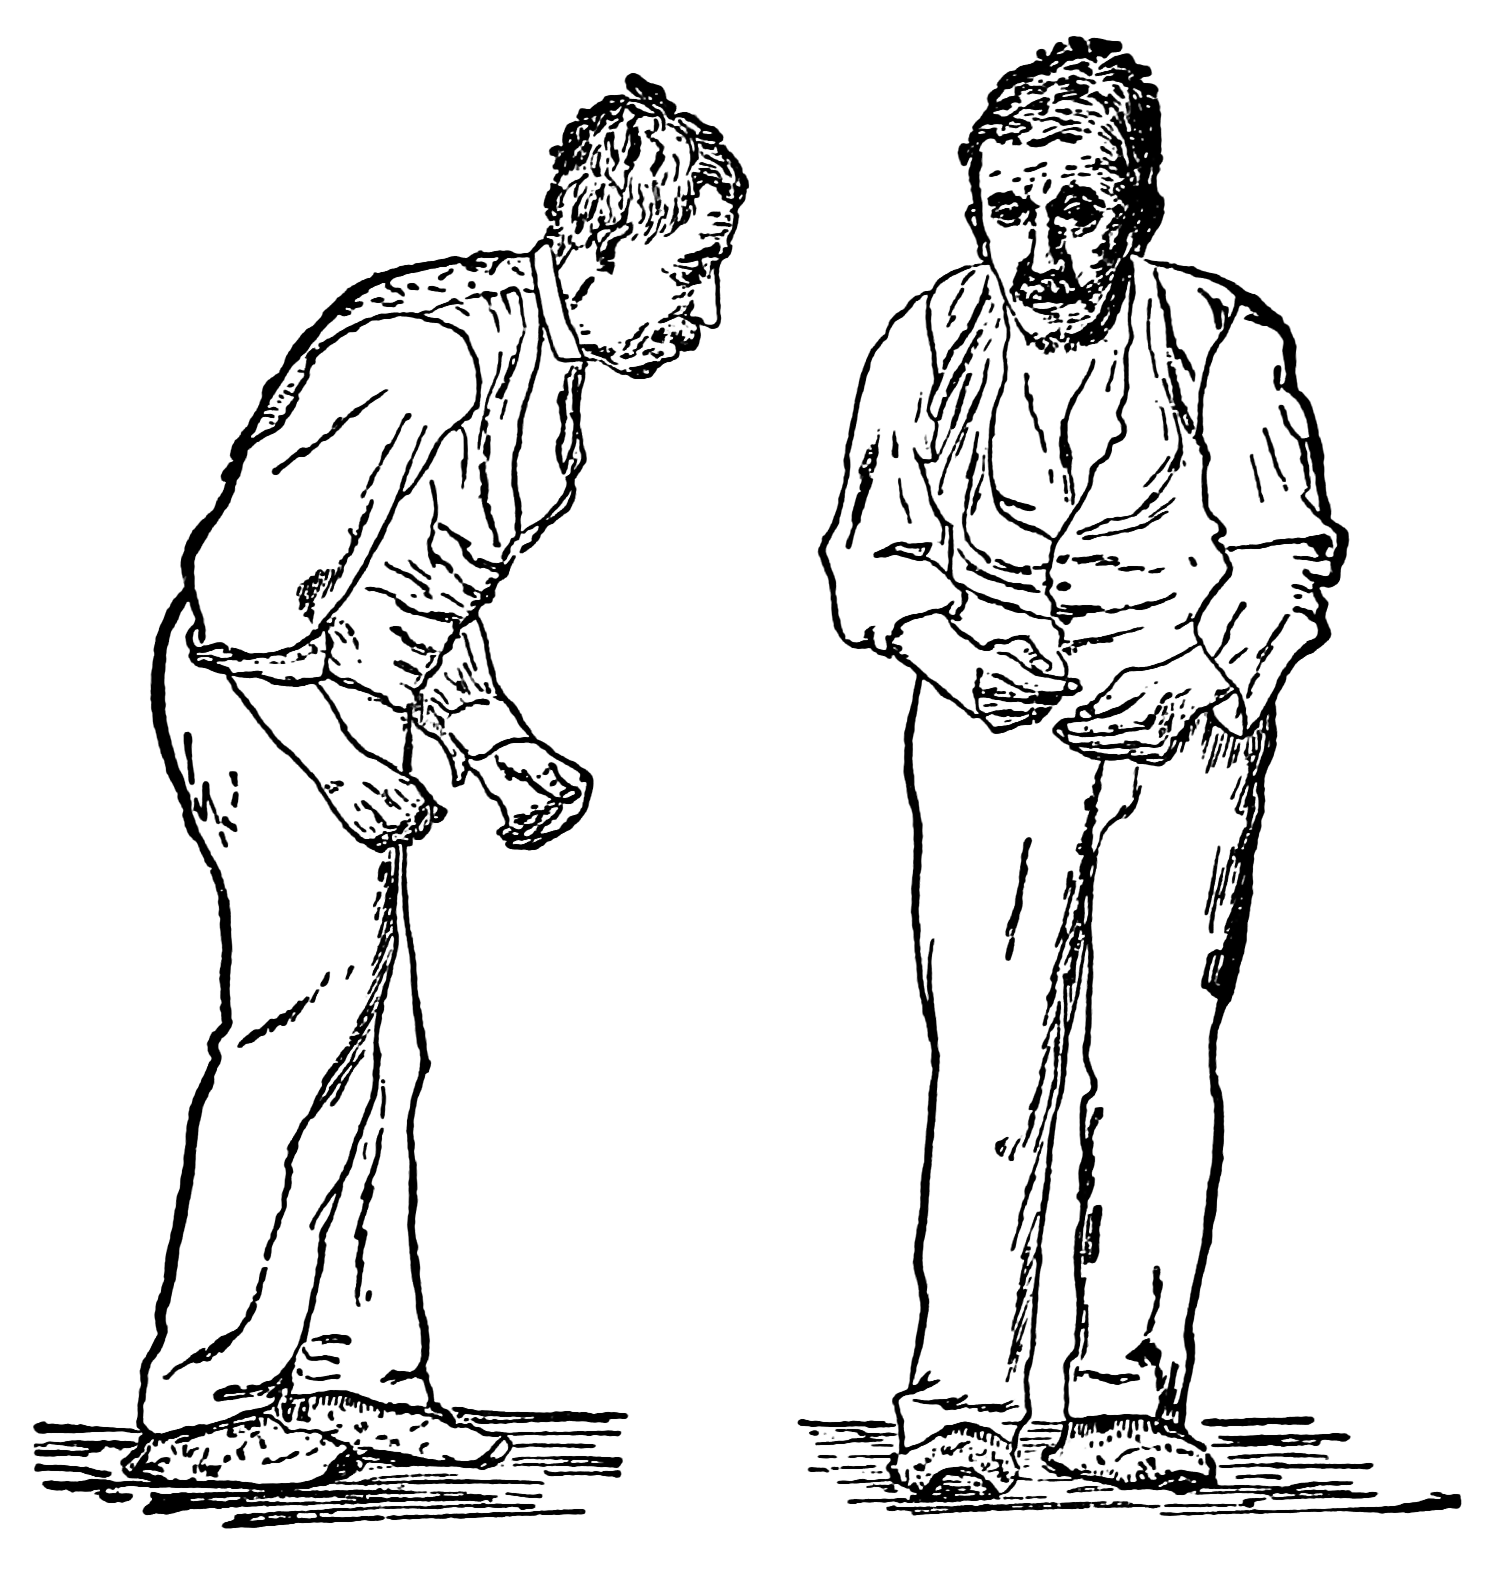

<h3><font color="silver"><b>What is parkinson disease?</b></font></h1>

<p align="justify">Parkinson's disease is a chronic and progressive neurodegenerative disorder that affects the central nervous system. It is caused by the loss of dopamine-producing cells in the brain, resulting in a variety of motor and non-motor symptoms. Common indications of the disease include tremors, stiffness, slow movement, and difficulty with coordination and balance. Although the disease was first described in 1817 by James Parkinson and is currently incurable, there are medications and therapies that can help manage symptoms and improve quality of life for those living with the condition.</p>



 <h3><font color="green"><b>Our role!?</b></font></h1>
 
<p align="justify">
Our goal is to predict the Unified Parkinson's Disease Rating Scale (UPDRS) scores for patient visit and for any potential visits 6, 12, and 24 months later. 
<p align="justify">
The Unified Parkinson's Disease Rating Scale (UPDRS) is a widely used assessment tool by healthcare providers and researchers to evaluate the severity of symptoms and monitor their progression over time in Parkinson's disease.
<p>
The UPDRS encompasses a comprehensive evaluation of both motor and non-motor symptoms related to the disease. The assessment consists of four parts:
<div align="justify">

*  Part I: Non-Motor Experiences of Daily Living (NEDL) evaluates the patient's daily activities and non-motor symptoms such as mood, behavior, and sleep.

*  Part II: Motor Examination assesses the severity of motor symptoms such as tremors, rigidity, bradykinesia, and postural instability.

*  Part III: Motor Section evaluates the patient's motor function, including activities like finger tapping, hand movements, and walking.
*  Part IV: Complications of Therapy evaluates the presence of medication side effects or complications.
</div>

</p>













 <h3><font color="red"><b>Train Dataset ?</b></font></h1>

 Here is the data we are going to work on:
 <div align="justify">
 <h5><font color="green"><b>train_clinical_data.csv : </b></font></h1>

This file includes various attributes related to patients with Parkinson's disease, these attributes are:

1. <b>visit_id</b> - ID code for the visit.
2. <b>visit_month</b> - The month of the visit, relative to the first visit by the patient.
3. <b>patient_id</b> - An ID code for the patient.
4. <b>updrs_[1-4]</b> - The patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.
5. <b>upd23b_clinical_state_on_medication</b> - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.

<h5><font color="green"><b>supplemental_clinical_data.csv : </b></font></h5>

Clinical records without any associated CSF samples. This data is intended to provide additional context about the typical progression of Parkinsons. Uses the same columns as train_clinical_data.csv.

<h5><font color="green"><b>train_peptides.csv : </b></font></h5>

The data pertains to mass spectrometry data obtained at the peptide level, where peptides are the building blocks of proteins. It includes:


1. <b>visit_id</b> - ID code for the visit.
2. <b>visit_month</b> - The month of the visit, relative to the first visit by the patient.
3. <b>patient_id</b> - An ID code for the patient.
4. <b>UniProt</b> - The UniProt ID code for the associated protein. There are often several peptides per protein.
5. <b>Peptide</b> - The sequence of amino acids included in the peptide. See this table for the relevant codes. Some rare annotations may not be included in the table. The test set may include peptides not found in the train set.
6. <b>PeptideAbundance</b> - The frequency of the amino acid in the sample.

<h5><font color="green"><b>train_proteins.csv : </b></font></h5>

Protein expression frequencies aggregated from the peptide level data. This data includes:
1. <b>visit_id</b> - ID code for the visit.
2. <b>visit_month</b> - The month of the visit, relative to the first visit by the patient.
3. <b>patient_id</b> - An ID code for the patient.
4. <b>UniProt</b> - The UniProt ID code for the associated protein. There are often several peptides per protein. The test set may include proteins not found in the train set.
5. <b>NPX</b> - Normalized protein expression. The frequency of the protein's occurrence in the sample. May not have a 1:1 relationship with the component peptides as some proteins contain repeated copies of a given peptide.

</div>


 


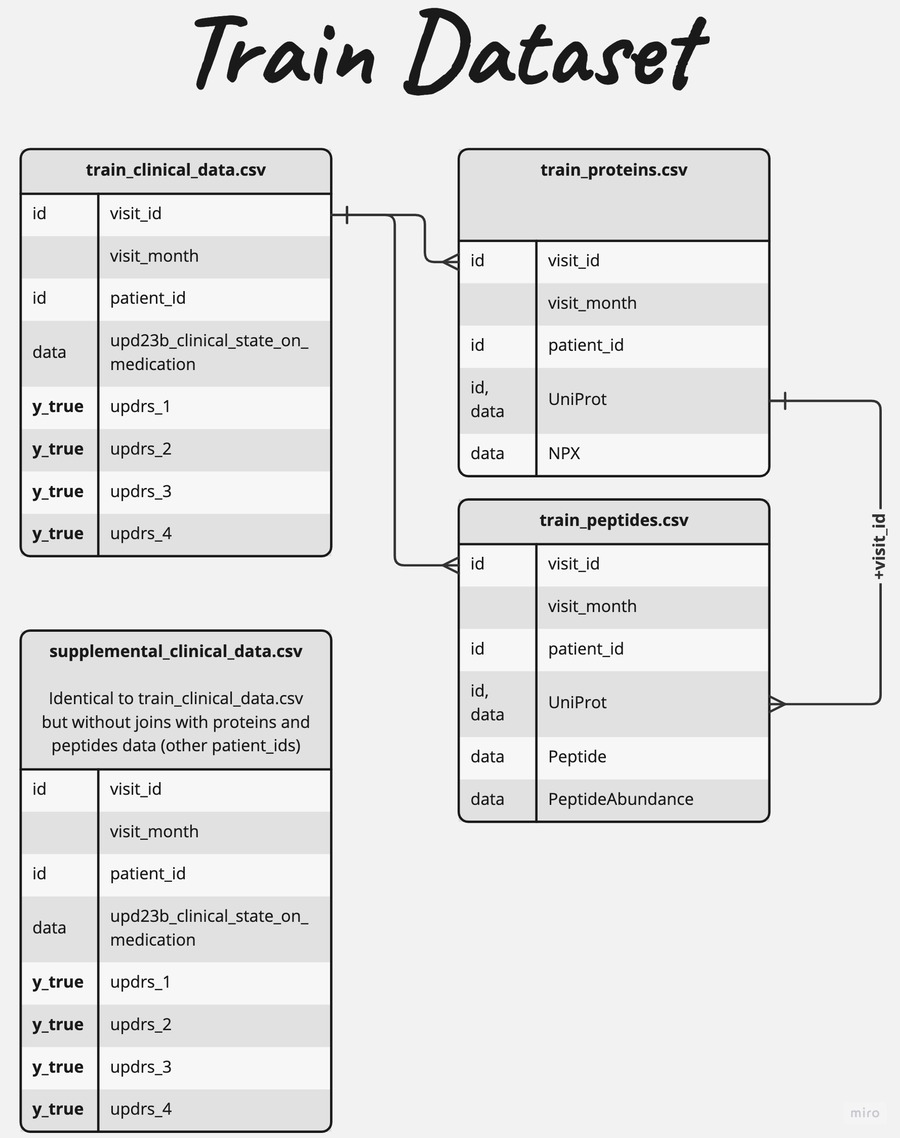

<h3><font color="red"><b>What do we have?</b></font></h1>
<div align="justify"> 

*   Essentially, the dataset contains information about patients (patient_id) who undergo periodic medical examinations during visits (visit_id) with a doctor. 
*   The table presented pertains to visits for patient_id = 55 over time and can be considered as a time series, with the visit_month column representing the date.

*   The data in train_clinical_data.csv and supplemental_clinical_data.csv includes measurements of various aspects of Parkinson's disease, specifically y_true data for updrs_1, updrs_2, updrs_3, and updrs_4.

*   For some visits in train_clinical_data.csv, additional medical test data is available in train_proteins.csv, which includes measurements of proteins, and in train_peptides.csv, which includes measurements of peptides.

*   The two protein and peptide datasets can be combined using a key of ('visit_id', 'UniProt'). However, not all patient_ids have additional data in train_proteins.csv and train_peptides.csv, as this information is only available in supplemental_clinical_data.csv.

</div>
---





<h3><font color="green"><b>Basic Info</b></font></h1>


---

In [ ]:
targets=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

Import libraries we will work with 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import missingno as msno
import plotly.express as px


Load our data files

In [ ]:
proteins = pd.read_csv('train_proteins.csv')
peptides = pd.read_csv('train_peptides.csv')
clinical = pd.read_csv('train_clinical_data.csv')
supplemental = pd.read_csv('supplemental_clinical_data.csv')

> ***proteins***

In [ ]:
proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
33320,56075_0,0,56075,O15394,44448.6
33321,56075_0,0,56075,O43505,215663.0
33322,56075_0,0,56075,O60888,103812.0
33323,56075_0,0,56075,O75144,100836.0


In [ ]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66601 entries, 0 to 66600
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visit_id     66601 non-null  object 
 1   visit_month  66601 non-null  int64  
 2   patient_id   66601 non-null  int64  
 3   UniProt      66601 non-null  object 
 4   NPX          66600 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ MB


In [ ]:
print('The number of null values in proteins datast is: ',proteins.isna().sum().sum())

The number of null values in proteins datast is:  1


In [ ]:
proteins['NPX'].describe()

count    6.660000e+04
mean     2.727438e+06
std      2.245117e+07
min      2.232180e+02
25%      2.973253e+04
50%      1.136720e+05
75%      5.670230e+05
max      5.926610e+08
Name: NPX, dtype: float64

> ***clinical***

In [ ]:
clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [ ]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [ ]:
print('The number of null values in clinical datast for each feature\n',clinical.isna().sum())

The number of null values in clinical datast for each feature
 visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64


In [ ]:
clinical[['updrs_1', 'updrs_2','updrs_3','updrs_4']].describe()

,updrs_1,updrs_2,updrs_3,updrs_4
count,2614.000000,2613.00000,2590.000000,1577.000000
mean,7.110559,6.74359,19.421236,1.861763
std,5.525955,6.32323,15.000289,3.022112
min,0.000000,0.00000,0.000000,0.000000
25%,3.000000,1.00000,6.000000,0.000000
50%,6.000000,5.00000,19.000000,0.000000
75%,10.000000,10.00000,29.000000,3.000000
max,33.000000,40.00000,86.000000,20.000000


> ***peptides***

In [ ]:
peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
peptides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [ ]:
print('The number of null values in peptides dataset is: ',proteins.isna().sum().sum())

The number of null values in peptides dataset is:  0


In [ ]:
peptides['PeptideAbundance'].describe()

count    9.818340e+05
mean     6.428902e+05
std      3.377989e+06
min      1.099850e+01
25%      2.817425e+04
50%      7.430830e+04
75%      2.213388e+05
max      1.787520e+08
Name: PeptideAbundance, dtype: float64

<h3><font color="green"><b>EDA</b></font></h1>


---





> <p align="justify"><b>Now we will perform exploratory data analysis (EDA) to extract meaningful   insights and identify patterns or relationships between variables. Conducting EDA is essential as it can detect issues related to data quality, such as missing values, outliers, and other anomalies, that need to be addressed before proceeding with further analysis.</b></p>






> Analysis:

<div align='justify'>

Based on our earlier research, we discovered that the clinical dataset is the only one that has missing values. As shown in the following plot, almost 50% of the values in the upd23b_clinical_state_on_medication column and around 40% of the values in the updrs_4 column are null. The current dilemma is whether to retain the upd23b_clinical_state_on_medication column or substitute the missing values with 'off' or 'on' at random.

</div>




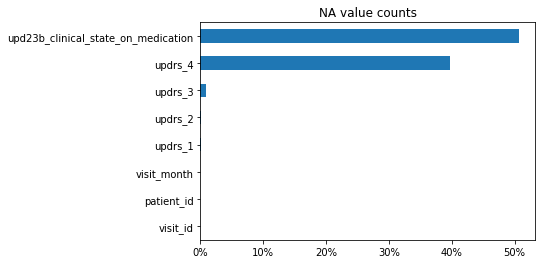

In [ ]:
(clinical.isna().sum()/clinical.shape[0]).plot(kind='barh', title = 'NA value counts')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

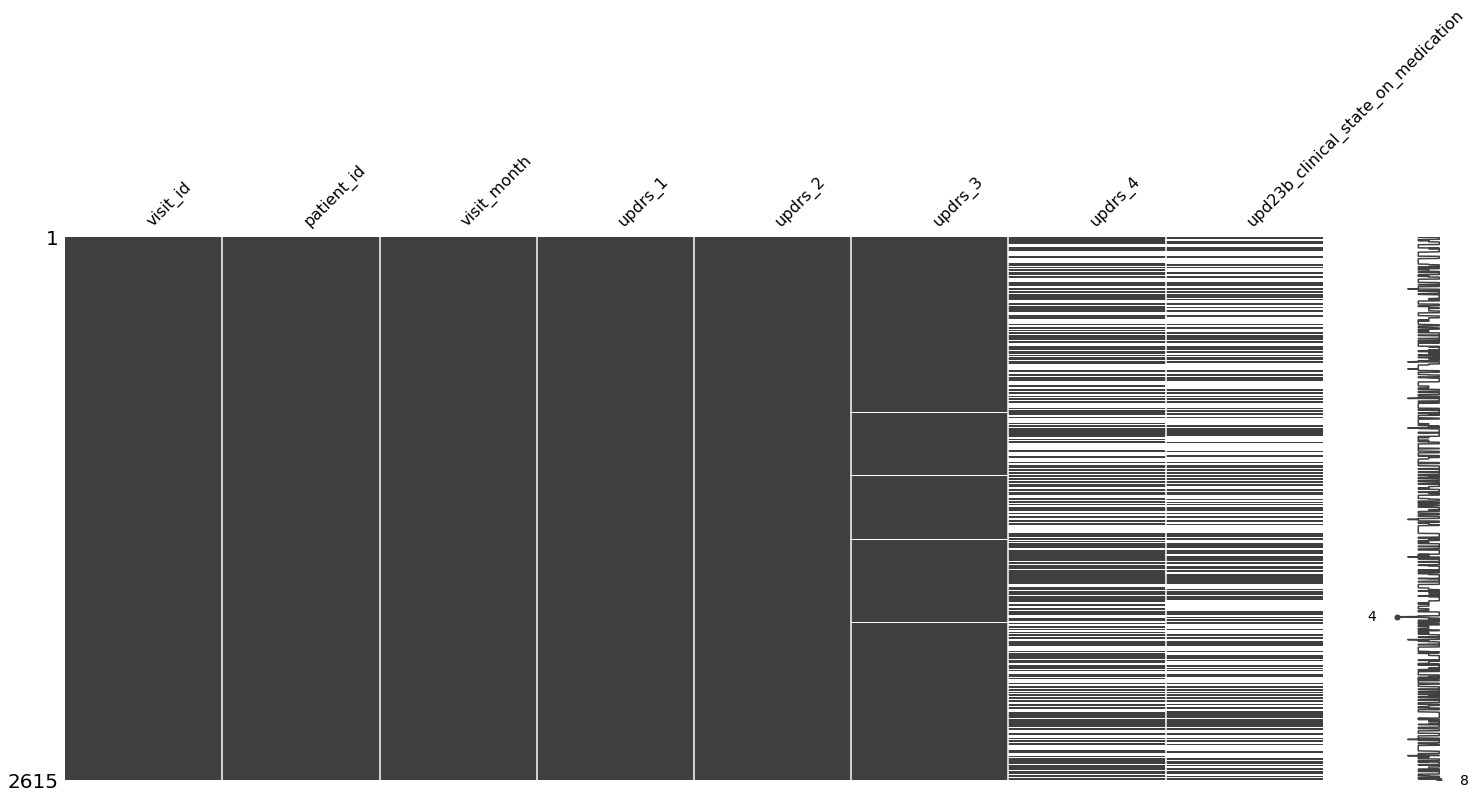

In [ ]:
msno.matrix(clinical)
plt.show()

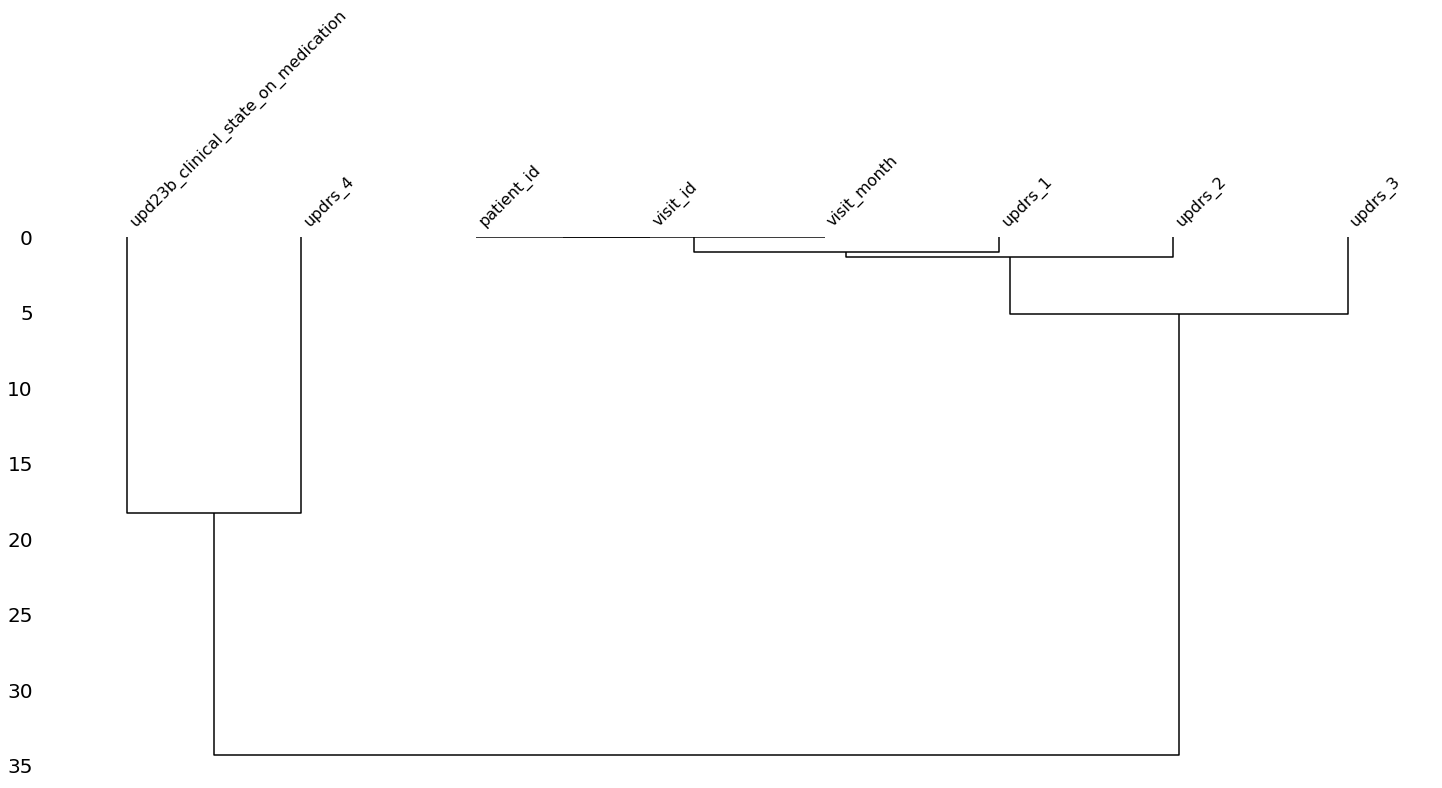

In [ ]:
msno.dendrogram(clinical)
plt.show()

In [ ]:
updrs_4_missing = len(clinical[clinical['updrs_4'].isna()])
upd23b_clinical_state_on_medication_missing = len(clinical[clinical['upd23b_clinical_state_on_medication'].isna()])

both_missing = len(clinical[(clinical['updrs_4'].isna()) & (clinical['upd23b_clinical_state_on_medication'].isna())])

print('The percentage of rows that contains both updrs_4 and upd23b_clinical_state_on_medication missing :  ',(both_missing/clinical.shape[0]) *100,'\n The number of rows with updrs_4 is null :', updrs_4_missing,'\n The number of rows with upd23b_clinical_state_on_medication is null', upd23b_clinical_state_on_medication_missing)

The percentage of rows that contains both updrs_4 and upd23b_clinical_state_on_medication missing :   38.8527724665392 
 The number of rows with updrs_4 is null : 1038 
 The number of rows with upd23b_clinical_state_on_medication is null 1327


> Analysis

<div align='justify'>

According to the previous plots, there seems to be an association between updrs_4 and upd23b_clinical_state_on_medication, as almost all instances where the value of updrs_4 is null, upd23b_clinical_state_on_medication is also undefined. This is not unexpected, given that UPDRS-IV score is frequently employed in clinical trials and research studies to evaluate the efficacy of various medications and treatment approaches for Parkinson's disease.</div>

<div align="justify"> 

It's reasonable to make the assumption that missing data may be linked to cognitive and memory issues experienced by patients with Parkinson's disease. These challenges can make it difficult for patients to accurately report their medication usage or remember to take their medication as prescribed. But me

</div>

<div align="justify"> 

Therefore, it's crucial for healthcare providers to understand the unique challenges faced by patients with Parkinson's disease and to work collaboratively with them to develop a medication management plan that is feasible, effective, and takes into account the patient's individual needs and circumstances.

Therefore, the upcoming plot will illustrate that typically  patients in the following months indicate whether or not they are taking the medication.
</div>




In [ ]:
clinical_copy = clinical.copy()
clinical_copy['upd23b_clinical_state_on_medication'] = \
clinical_copy['upd23b_clinical_state_on_medication'].fillna('Null')

fig=px.histogram(clinical_copy,
                 x = 'visit_month',
                 color = 'upd23b_clinical_state_on_medication',
                 title="<b>Count of visit_month",
                 color_discrete_sequence=px.colors.qualitative.Vivid,
                 width=800, height=500)
fig.update_layout(template="seaborn")
fig.update_layout(title_font_size=20)
fig.show()

In the context of clinical data, it is often recommended to use the median rather than the mean, as clinical data often has non-normal distributions and outliers. Additionally, using the median can be more robust to missing data or measurement errors.

In [ ]:
# For each month, we calculate the median of targets where upd23b_clinical_state_on_medication is equal to 'On'
clinical_On = clinical[clinical['upd23b_clinical_state_on_medication'] == 'On']
med_on = clinical_On.groupby('visit_month',as_index=True)[targets].median()
med_on

,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,
0,10.0,8.0,21.0,2.0
6,10.0,8.0,23.0,2.0
9,5.0,7.0,17.0,0.0
12,9.0,7.0,18.0,0.0
18,8.0,8.0,20.5,0.0
24,9.0,7.0,19.0,1.0
30,9.0,9.0,24.0,0.0
36,8.0,8.0,22.0,1.0
42,9.0,8.5,25.0,0.0


In [ ]:
# For each month, we calculate the median of targets where upd23b_clinical_state_on_medication is equal to 'off'
clinical_off = clinical[clinical.upd23b_clinical_state_on_medication == 'Off']
med_off = clinical_off.groupby('visit_month',as_index=True)[targets].median()
med_off

,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,
0,8.5,7.0,30.0,2.0
6,2.0,7.0,30.0,6.0
9,8.0,13.0,25.0,0.0
12,8.0,9.5,27.0,0.0
18,8.0,6.0,22.0,0.0
24,8.0,8.5,28.0,0.0
30,6.0,6.0,25.0,0.0
36,8.0,8.0,30.5,0.0
42,7.0,8.0,26.0,0.0


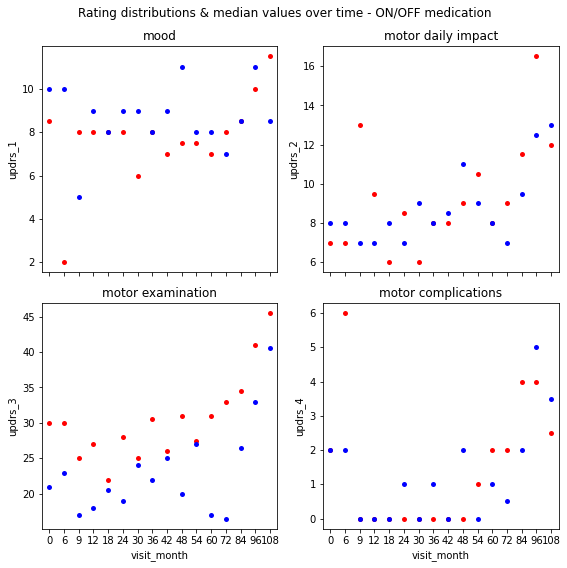

In [ ]:
# red is for med_off and blue is for med_on

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, figsize=(8,8))
updr_labels = ['mood','motor daily impact','motor examination','motor complications']

for e, ax in enumerate(ax.flat):
    sns.stripplot(data = med_off.reset_index(), x='visit_month', y=f'updrs_{e+1}', color='red', label='median', ax = ax)
    sns.stripplot(data = med_on.reset_index(), x='visit_month', y=f'updrs_{e+1}', color='blue', label='median', ax = ax)
    ax.legend().set_visible(False)
    ax.set_title(updr_labels[e])
    
plt.suptitle('Rating distributions & median values over time - ON/OFF medication')
plt.tight_layout()
plt.show()

> Analysis: 

<div align='justify'>

Based on these plots, it appears that the column 'upd23b_clinical_state_on_medication' does not have a direct impact on 'updrs_1', 'updrs_3' and 'updrs_2'. So now we can take the decision to remove 'upd23b_clinical_state_on_medication' column.
</div>

In [ ]:
clinical = clinical.drop('upd23b_clinical_state_on_medication',axis=1).dropna()

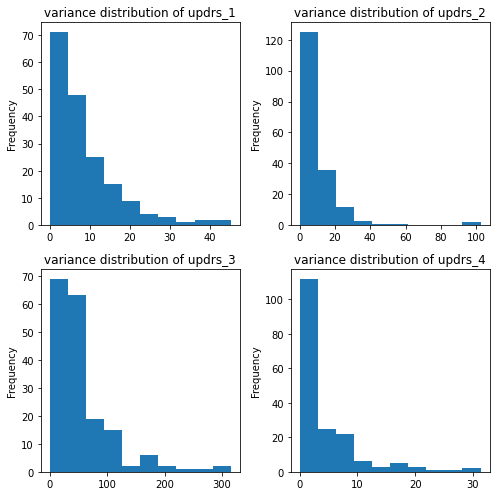

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (7,7))
for e, ax in enumerate(ax.flat):
    clinical.groupby('patient_id')[f'updrs_{e+1}'].var().plot(kind='hist',title = f'variance distribution of updrs_{e+1}',ax=ax)
plt.tight_layout()

The plot provides insight into the distribution of variance values for each UPDRS part in the patient population.

> **Correlation between updrs score parts**






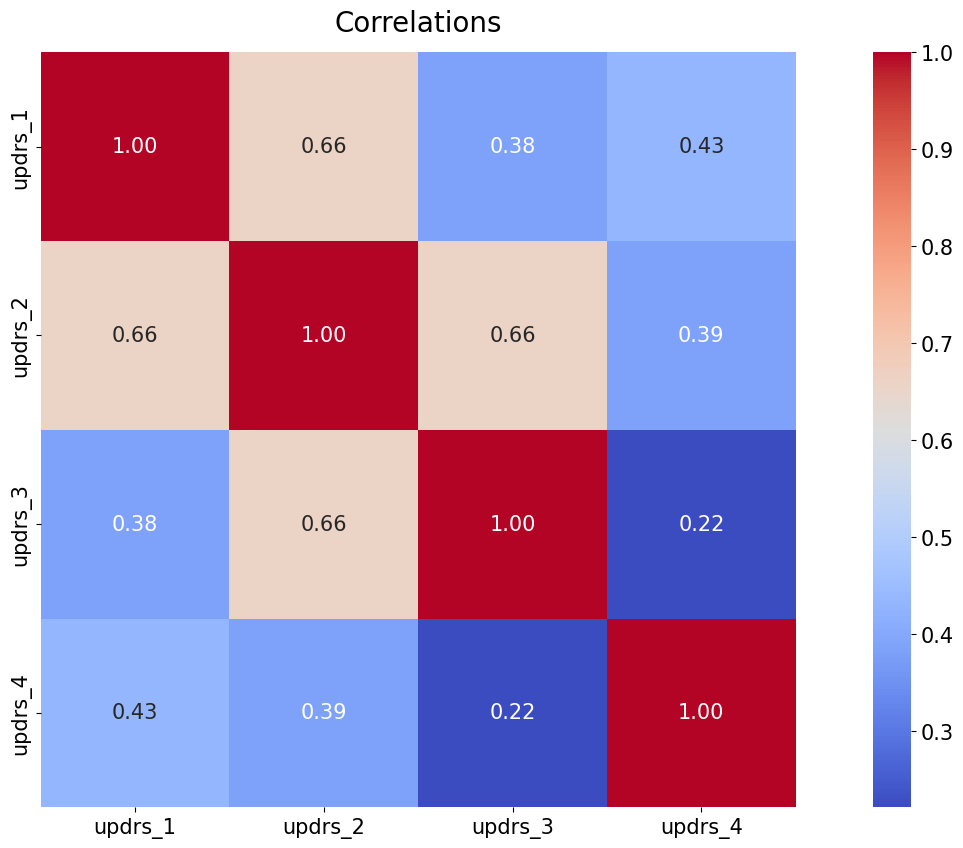

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=100)
ax = sns.heatmap(
        clinical[['updrs_1','updrs_2','updrs_3','updrs_4']].corr(),
        annot=True,
        square=True,
        cmap='coolwarm',
        annot_kws={'size': 15},
        fmt='.2f'
    )
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Correlations', size=20, pad=15)
plt.show()

> Analysis
<div align='justify'>

The heatmap reveals a moderate correlation between updrs_1 and updrs_2 (Pearson correlation coefficient of 0.66) and between updrs_2 and updrs_3 (Pearson correlation coefficient of 0.66). However, it's important to note that correlation does not necessarily imply causation, and that there may be other factors influencing the relationship between these two variables.

</div>


> **Correlation between UPDRS score parts and serum NPX levels of proteins in Parkinson's disease patients for month 0**


In [ ]:
clinical_month_0 = clinical[clinical.visit_month == 0]                                            

# merging the UPDRS scores and the "NPX" protein data based on their shared "visit_id" index for month 0
prot_cli = clinical_month_0.set_index('visit_id')[targets]\
    .merge(proteins.pivot(index='visit_id',columns='UniProt')["NPX"], left_index=True,right_index=True)

prot_cli

,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O00584,O14498,O14773,O14791,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
1517_0,11.0,6.0,25.0,5.0,11648.90,419015.0,35053.80,NaN,17466.30,2784.400,...,306280.0,24931.30,NaN,12610.90,40018.9,164826.0,55379.80,31563.00,19771.60,14699.50
3863_0,8.0,13.0,36.0,4.0,12407.60,686407.0,27439.60,38453.4,22873.00,NaN,...,NaN,70567.00,124512.0,16938.30,50230.6,296926.0,89187.10,24375.40,18345.30,50924.90
8699_0,17.0,13.0,11.0,4.0,7361.28,484747.0,21651.70,NaN,14695.20,5319.250,...,NaN,27296.80,NaN,9211.28,22633.7,119255.0,96959.70,14763.70,27225.50,5919.37
10053_0,3.0,0.0,13.0,0.0,9104.27,402321.0,NaN,NaN,7150.57,2497.840,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.00,15382.00,NaN,19017.40
10718_0,0.0,0.0,5.0,0.0,9563.38,547736.0,18602.80,19873.7,6880.61,1325.220,...,NaN,35476.60,127700.0,12354.40,33591.1,140054.0,38579.30,15598.00,9302.63,35146.50
11459_0,17.0,13.0,30.0,0.0,13541.60,421862.0,27429.90,21302.7,21044.50,1786.040,...,NaN,26300.30,NaN,16325.10,43413.1,178426.0,79998.90,16221.50,30535.70,5591.20
12516_0,3.0,0.0,0.0,0.0,13118.50,817225.0,44051.40,40308.6,29285.90,2154.530,...,274922.0,60396.20,NaN,21602.80,41746.9,410835.0,70224.20,29435.50,25649.80,16245.00
14242_0,8.0,2.0,15.0,2.0,NaN,478938.0,6437.41,17809.8,12897.20,2149.960,...,252548.0,49957.20,89155.0,NaN,39424.7,251317.0,54381.50,11897.70,14812.80,13228.60
14811_0,14.0,9.0,33.0,3.0,NaN,322915.0,NaN,40920.1,19994.00,2266.960,...,NaN,NaN,NaN,NaN,21552.4,211449.0,108371.00,8988.43,NaN,4071.09


In [ ]:
#Compute correlation matrix
prot_corr = prot_cli.corr()
prot_corr

,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O00584,O14498,O14773,O14791,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
updrs_1,1.000000,0.727198,0.548466,0.486437,-0.047882,-0.328507,-0.036246,-0.262605,-0.085598,0.207448,...,-0.346573,-0.151048,-0.255858,-0.202729,-0.059286,-0.294052,0.111485,-0.068900,-0.012517,-0.294680
updrs_2,0.727198,1.000000,0.746746,0.516348,0.061898,-0.274509,0.015002,-0.196689,-0.055583,0.110031,...,-0.200752,-0.110185,0.044575,-0.257453,0.095442,-0.236764,0.162874,-0.207472,0.016194,-0.094863
updrs_3,0.548466,0.746746,1.000000,0.400143,0.030389,-0.207406,0.185402,-0.007082,-0.040387,-0.070439,...,-0.322195,-0.149847,-0.053120,-0.078733,0.163610,-0.134145,0.184703,-0.124917,0.047777,0.113793
updrs_4,0.486437,0.516348,0.400143,1.000000,0.070506,-0.204335,-0.052638,-0.232257,0.006771,0.134857,...,-0.311250,-0.208384,0.080979,-0.301927,0.031200,-0.219149,0.097812,-0.123505,-0.044164,-0.064239
O00391,-0.047882,0.061898,0.030389,0.070506,1.000000,0.678630,0.340877,0.508822,0.274252,-0.078930,...,-0.104102,0.334802,0.496598,0.590900,0.576714,0.422849,0.202504,0.417291,0.039299,0.146471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UHG2,-0.294052,-0.236764,-0.134145,-0.219149,0.422849,0.696653,0.433685,0.734128,0.492238,-0.025310,...,0.140117,0.588355,0.054895,0.673305,0.356160,1.000000,0.208124,0.537635,0.416992,0.371793
Q9UKV8,0.111485,0.162874,0.184703,0.097812,0.202504,0.165703,0.194924,0.293630,0.307795,0.186681,...,-0.112455,0.025243,0.394564,0.115123,0.154876,0.208124,1.000000,0.186727,0.125003,-0.076245
Q9UNU6,-0.068900,-0.207472,-0.124917,-0.123505,0.417291,0.652790,0.512360,0.617513,0.447668,0.000164,...,-0.089867,0.561114,-0.016840,0.574483,0.413366,0.537635,0.186727,1.000000,0.327729,0.347253
Q9Y646,-0.012517,0.016194,0.047777,-0.044164,0.039299,0.417241,0.461673,0.351622,0.586806,-0.192090,...,-0.023331,0.368490,0.044115,0.337972,0.474258,0.416992,0.125003,0.327729,1.000000,0.139788


To optimize the visualization of the correlation matrix, we will only display the first four rows and columns starting from index 4.

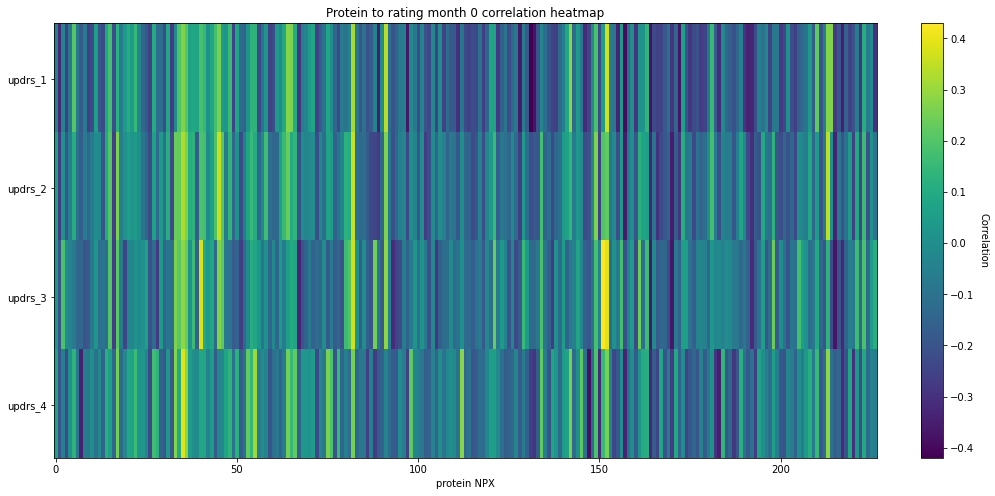

In [ ]:
fig, ax = plt.subplots(figsize=[20,8])

im = ax.imshow(np.repeat(prot_corr.iloc[:4,4:].values, (120/4), axis=0))
ax.set_title('Protein to rating month 0 correlation heatmap')
ax.set_yticks(np.array([1,2,3,4])*30-15, targets)
ax.set_xlabel('protein NPX')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")

plt.show()

In [ ]:
# Select the protein that shows a strongest positive correlation with each UPDRS score component.
top_proteins_pos = [prot_corr.iloc[i,4:].T.sort_values(ascending=False)[:1] for i in range(4)]
protein_features_pos = np.array([top_proteins_pos[i].index.to_list() for i in range(4)]).flatten()
print(f'Proteins with the strongest positive correlation: {protein_features_pos}')


Proteins with the strongest positive correlation: ['P32754' 'P01876' 'P31997' 'P01608']


In [ ]:
# Select the protein that shows a strongest negative correlation with each UPDRS score component.
top_proteins_neg = [prot_corr.iloc[i,4:].T.sort_values()[:1] for i in range(4)]
protein_features_neg = np.array([top_proteins_neg[i].index.to_list() for i in range(4)]).flatten()
print(f'Proteins with the strongest negative correlation: {protein_features_neg}')

Proteins with the strongest negative correlation: ['P14618' 'P39060' 'Q99969' 'P24592']


Now we will visualize these correlations.


P32754
P01876
P31997
P01608


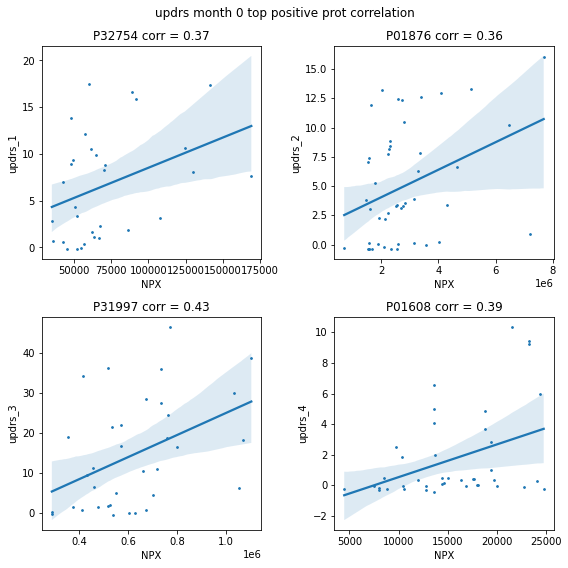

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8,8))
updrs=1
for e, ax in enumerate(ax.flat):
    updrs_fmt = f'updrs_{updrs}'
    prot_id = top_proteins_pos[updrs-1].index[0]
    print(prot_id)
    plot_df = clinical_month_0.merge(proteins,on='visit_id').query('UniProt == @prot_id')
    sns.regplot(data=plot_df,y=updrs_fmt,x='NPX',ax = ax, y_jitter = .5,scatter_kws = {'s':3,'alpha':1})
    ax.set_title(f'{prot_id} corr = {top_proteins_pos[updrs-1][prot_id]:.2f}')
    updrs+=1
    plt.suptitle('updrs month 0 top positive prot correlation')
    plt.tight_layout()

plt.show()

P14618
P39060
Q99969
P24592


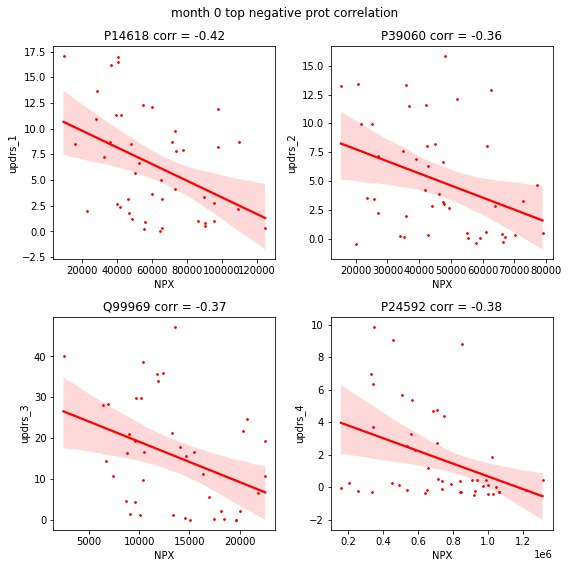

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8,8))
updrs=1
for e, ax in enumerate(ax.flat):
    updrs_fmt = f'updrs_{updrs}'
    prot_id = top_proteins_neg[updrs-1].index[0]
    print(prot_id)
    plot_df = clinical_month_0.merge(proteins,on='visit_id').query('UniProt == @prot_id')
    sns.regplot(data=plot_df,y=updrs_fmt,x='NPX',ax = ax, y_jitter = .5,scatter_kws = {'s':3,'alpha':1},color='red')
    ax.set_title(f'{prot_id} corr = {top_proteins_neg[updrs-1][prot_id]:.2f}')
    updrs+=1
    plt.suptitle('month 0 top negative prot correlation')
    plt.tight_layout()

plt.show()

> **Correlation between UPDRS score parts and PeptideAbundance of peptide in Parkinson's disease patients for month 0**

In [ ]:
pep_clinical = clinical_month_0.set_index('visit_id')[targets]\
    .merge(peptides[peptides.UniProt.isin(protein_features_pos) | peptides.UniProt.isin(protein_features_neg)  ].pivot(index='visit_id',columns='Peptide')["PeptideAbundance"], left_index=True,right_index=True)
pep_corr = pep_clinical.corr()
pep_corr

,updrs_1,updrs_2,updrs_3,updrs_4,DASGVTFTWTPSSGK,EAEEHQETQC(UniMod_4)LR,EGQEC(UniMod_4)GVYTPNC(UniMod_4)APGLQC(UniMod_4)HPPKDDEAPLR,GAQTLYVPNC(UniMod_4)DHR,GLEFLSVPSTYYK,HLDSVLQQLQTEVYR,IFSFDGKDVLR,IIGYVISNQQITPGPAYSNR,LDIDSPPITAR,LLIYDASK,LQDLYSIVR,NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK,NTGIIC(UniMod_4)TIGPASR,TFTC(UniMod_4)TAAYPESK,TPLTATLSK
updrs_1,1.000000,0.727198,0.548466,0.486437,0.271802,-0.279556,-0.283199,-0.238859,0.368322,-0.155744,-0.345032,0.047087,-0.230350,0.270796,-0.296499,0.319810,-0.362535,0.216871,0.222142
updrs_2,0.727198,1.000000,0.746746,0.516348,0.358209,-0.338426,-0.197469,-0.312783,0.227389,-0.050303,-0.262987,0.199953,-0.222410,0.326422,-0.253395,0.394980,-0.205494,0.359406,0.307273
updrs_3,0.548466,0.746746,1.000000,0.400143,0.278966,-0.372351,-0.161623,-0.367350,0.393317,-0.140096,-0.182593,0.430343,-0.146262,0.286851,-0.172878,0.286261,-0.026274,0.282382,0.215145
updrs_4,0.486437,0.516348,0.400143,1.000000,-0.010485,-0.162961,-0.335851,-0.096261,0.257727,-0.280667,-0.345949,0.150925,-0.231471,0.389146,-0.273855,-0.018393,-0.287900,-0.045454,-0.007350
DASGVTFTWTPSSGK,0.271802,0.358209,0.278966,-0.010485,1.000000,-0.256360,-0.095649,-0.218483,0.165149,0.081821,0.064981,0.088117,-0.390763,0.228267,0.204681,0.821724,-0.348403,0.886036,0.883131
EAEEHQETQC(UniMod_4)LR,-0.279556,-0.338426,-0.372351,-0.162961,-0.256360,1.000000,0.351401,0.531946,-0.024776,-0.113778,0.227879,-0.274528,0.344911,0.146209,0.099950,-0.058739,0.332843,-0.154528,-0.155519
EGQEC(UniMod_4)GVYTPNC(UniMod_4)APGLQC(UniMod_4)HPPKDDEAPLR,-0.283199,-0.197469,-0.161623,-0.335851,-0.095649,0.351401,1.000000,0.609500,-0.107087,0.700299,0.487901,-0.267564,0.569844,0.065592,0.547572,0.200394,0.627124,0.015727,-0.046133
GAQTLYVPNC(UniMod_4)DHR,-0.238859,-0.312783,-0.367350,-0.096261,-0.218483,0.531946,0.609500,1.000000,-0.095602,0.308062,0.038752,-0.297633,0.388596,0.006807,0.057306,-0.013774,0.360245,-0.043375,-0.071196
GLEFLSVPSTYYK,0.368322,0.227389,0.393317,0.257727,0.165149,-0.024776,-0.107087,-0.095602,1.000000,-0.037847,-0.174214,0.335583,-0.104545,0.116137,-0.148019,0.167285,-0.055717,0.174603,0.195453
HLDSVLQQLQTEVYR,-0.155744,-0.050303,-0.140096,-0.280667,0.081821,-0.113778,0.700299,0.308062,-0.037847,1.000000,0.293524,-0.292596,0.256369,-0.232517,0.649850,0.216705,0.171578,0.098073,0.024336


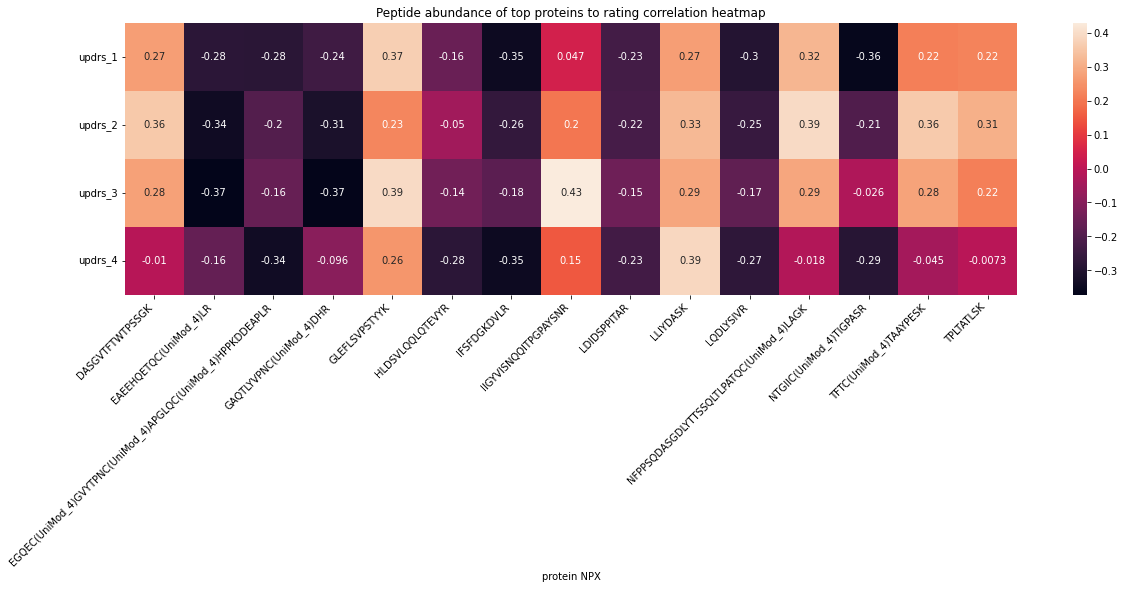

In [ ]:
fig, ax = plt.subplots(figsize=[20,5])
sns.heatmap(pep_corr.iloc[:4,4:],annot=True, ax=ax, xticklabels=True,yticklabels=True)

ax.set_title('Peptide abundance of top proteins to rating correlation heatmap')

ax.set_xlabel('protein NPX')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Select peptide that shows a strongest positive correlation with each UPDRS score component.
top_peptides_pos = [pep_corr.iloc[i,4:].T.sort_values(ascending=False)[:1] for i in range(4)]
peptide_features = np.array([top_peptides_pos[i].index.to_list() for i in range(4)]).flatten()
print(f'Peptides with the strongest positive correlation: {peptide_features}')

Peptides with the strongest positive correlation: ['GLEFLSVPSTYYK' 'NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK'
 'IIGYVISNQQITPGPAYSNR' 'LLIYDASK']


In [ ]:
# Select the peptide that shows a strongest negative correlation with each UPDRS score component.
top_peptides_neg = [pep_corr.iloc[i,4:].T.sort_values()[:1] for i in range(4)]
peptide_features = np.array([top_peptides_neg[i].index.to_list() for i in range(4)]).flatten()
print(f'Peptides with the strongest negative correlation: {peptide_features}')

Peptides with the strongest negative correlation: ['NTGIIC(UniMod_4)TIGPASR' 'EAEEHQETQC(UniMod_4)LR'
 'EAEEHQETQC(UniMod_4)LR' 'IFSFDGKDVLR']


Now we will visualize these correlations:

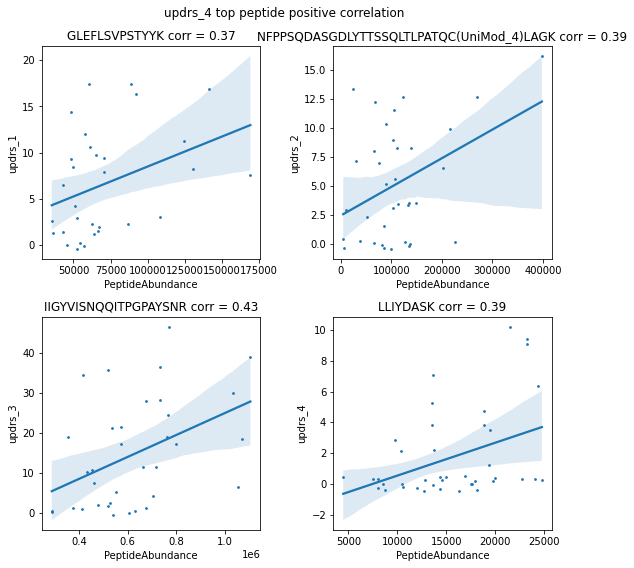

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8,8))
updrs=1
for e, ax in enumerate(ax.flat):
    updrs_fmt = f'updrs_{updrs}'
    pep_id = top_peptides_pos[updrs-1].index[0]
    plot_df = clinical_month_0.merge(peptides,on='visit_id').query('Peptide == @pep_id')
    sns.regplot(data=plot_df,y=updrs_fmt,x='PeptideAbundance',ax = ax, y_jitter = .5,scatter_kws = {'s':3,'alpha':1})
    ax.set_title(f'{pep_id} corr = {top_peptides_pos[updrs-1][pep_id]:.2f}')
    updrs+=1
    plt.suptitle(f'{updrs_fmt} top peptide positive correlation')
    plt.tight_layout()

plt.show()


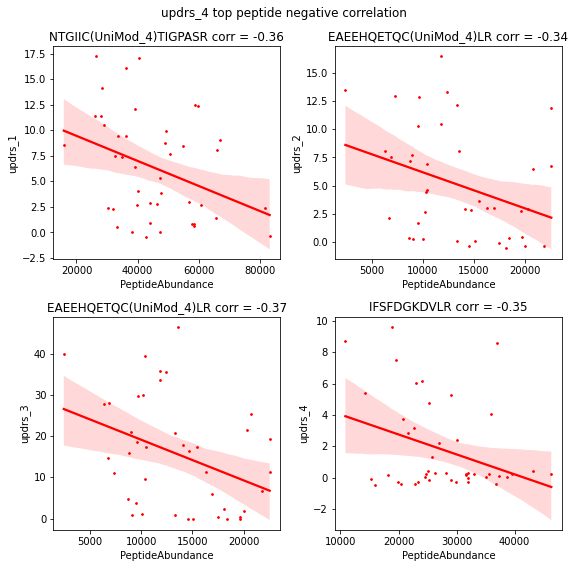

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8,8))
updrs=1
for e, ax in enumerate(ax.flat):
    updrs_fmt = f'updrs_{updrs}'
    pep_id = top_peptides_neg[updrs-1].index[0]
    plot_df = clinical_month_0.merge(peptides,on='visit_id').query('Peptide == @pep_id')
    sns.regplot(data=plot_df,y=updrs_fmt,x='PeptideAbundance',ax = ax, y_jitter = .5,scatter_kws = {'s':3,'alpha':1},color='red')
    ax.set_title(f'{pep_id} corr = {top_peptides_neg[updrs-1][pep_id]:.2f}')
    updrs+=1
    plt.suptitle(f'{updrs_fmt} top peptide negative correlation')
    plt.tight_layout()

plt.show()

In [ ]:
peptides.groupby('visit_id').agg({'UniProt':'nunique','patient_id':'count','Peptide':'nunique','PeptideAbundance': ['min','max','mean','std']}).reset_index()

visit_id UniProt patient_id Peptide PeptideAbundance               \
               nunique      count nunique              min          max   
0      10053_0     165        649     649          82.9679   66333900.0   
1     10053_12     171        633     633         128.4460   73059300.0   
2     10053_18     208        868     868         108.5000   64711200.0   
3     10138_12     217        932     932         129.0240   71652400.0   
4     10138_24     219        918     918         142.6480  123897000.0   
...        ...     ...        ...     ...              ...          ...   
1108   8699_24     216        911     911         106.9420   99846400.0   
1109    942_12     212        889     889          88.3277   70888500.0   
1110    942_24     217        910     910         108.7050   71995500.0   
1111    942_48     216        907     907         148.1360   70658500.0   
1112     942_6     216        918     918         158.8690   58472500.0   

                                   
               mean           std  
0     726248.393431  3.535602e+06  
1     737183.385744  3.799654e+06  
2     601466.784320  3.006568e+06  
3     699099.199189  3.379573e+06  
4     732120.888877  4.912602e+06  
...             ...           ...  
1108  726494.824901  4.080307e+06  
1109  623193.979635  3.362987e+06  
1110  623849.652027  3.294163e+06  
1111  659297.802601  3.359265e+06  
1112  582795.558517  2.734257e+06  

[1113 rows x 8 columns]

In [ ]:
proteins_npx_ft = proteins.groupby('visit_id').agg(NPX_min=('NPX','min'), NPX_max=('NPX','max'), NPX_mean=('NPX','mean'), NPX_std=('NPX','std'))\
                .reset_index()
proteins_npx_ft.head()

,visit_id,NPX_min,NPX_max,NPX_mean,NPX_std
0,10053_0,2497.84,269126000.0,2.856580e+06,2.131630e+07
1,10053_12,5800.87,270030000.0,2.728871e+06,2.092162e+07
2,10053_18,1334.11,278835000.0,2.509967e+06,1.969453e+07
3,10138_12,2520.24,365582000.0,3.002583e+06,2.516170e+07
4,10138_24,1436.94,396894000.0,3.068891e+06,2.716806e+07


In [ ]:
df_proteins = pd.merge(proteins, df_0, on = 'visit_id', how = 'inner').reset_index()
proteins_Uniprot_updrs = df_proteins.groupby('UniProt').agg(updrs_1_sum = ('updrs_1','mean')).reset_index()
proteins_Uniprot_updrs.head()

,UniProt,updrs_1_sum
0,O00391,4.971014
1,O00533,5.319588
2,O00584,5.286458
3,O14498,5.217877
4,O14773,5.371585


In [ ]:
df_proteins = pd.merge(proteins, proteins_Uniprot_updrs, on = 'UniProt', how = 'left')
proteins_UniProt_ft = df_proteins.groupby('visit_id').agg(proteins_updrs_1_min=('updrs_1_sum','min'), proteins_updrs_1_max=('updrs_1_sum','max'),\
                                                          proteins_updrs_1_mean=('updrs_1_sum','mean'), proteins_updrs_1_std=('updrs_1_sum','std'))\
                .reset_index()
proteins_UniProt_ft.head()

,visit_id,proteins_updrs_1_min,proteins_updrs_1_max,proteins_updrs_1_mean,proteins_updrs_1_std
0,10053_0,4.892857,5.601449,5.300548,0.077355
1,10053_12,4.816794,5.652174,5.296073,0.099055
2,10053_18,4.297619,5.652174,5.272617,0.134631
3,10138_12,4.297619,5.652174,5.263118,0.143238
4,10138_24,4.297619,5.652174,5.269522,0.137776


In [ ]:
peptides_PeptideAbundance_ft = peptides.groupby('visit_id').agg(Abe_min=('PeptideAbundance','min'), Abe_max=('PeptideAbundance','max'),\
                                                                Abe_mean=('PeptideAbundance','mean'), Abe_std=('PeptideAbundance','std'))\
                .reset_index()
peptides_PeptideAbundance_ft.head()

,visit_id,Abe_min,Abe_max,Abe_mean,Abe_std
0,10053_0,82.9679,66333900.0,726248.393431,3.535602e+06
1,10053_12,128.4460,73059300.0,737183.385744,3.799654e+06
2,10053_18,108.5000,64711200.0,601466.784320,3.006568e+06
3,10138_12,129.0240,71652400.0,699099.199189,3.379573e+06
4,10138_24,142.6480,123897000.0,732120.888877,4.912602e+06


In [ ]:
df_peptides = pd.merge(peptides, df_0, on = 'visit_id', how = 'inner').reset_index()
peptides_PeptideAbundance_updrs = df_peptides.groupby('Peptide').agg(updrs_1_sum = ('updrs_1','mean')).reset_index()
peptides_PeptideAbundance_updrs.head()

,Peptide,updrs_1_sum
0,AADDTWEPFASGK,5.357143
1,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,5.296703
2,AAFTEC(UniMod_4)C(UniMod_4)QAADK,5.305699
3,AANEVSSADVK,5.364780
4,AATGEC(UniMod_4)TATVGKR,5.146497


In [ ]:
df_peptides = pd.merge(peptides, peptides_PeptideAbundance_updrs, on = 'Peptide', how = 'left')
peptides_ft = df_peptides.groupby('visit_id').agg(peptides_updrs_1_min=('updrs_1_sum','min'), peptides_updrs_1_max=('updrs_1_sum','max'),\
                                                          peptides_updrs_1_mean=('updrs_1_sum','mean'), peptides_updrs_1_std=('updrs_1_sum','std'))\
                .reset_index()
peptides_ft

,visit_id,peptides_updrs_1_min,peptides_updrs_1_max,peptides_updrs_1_mean,peptides_updrs_1_std
0,10053_0,4.878788,5.661972,5.279278,0.092880
1,10053_12,4.816794,5.661972,5.277513,0.097712
2,10053_18,4.297619,5.661972,5.265384,0.116303
3,10138_12,4.297619,5.661972,5.253513,0.126117
4,10138_24,4.297619,5.661972,5.257710,0.123452
...,...,...,...,...,...
1108,8699_24,4.572519,5.661972,5.256902,0.123395
1109,942_12,4.572519,5.661972,5.254323,0.118205
1110,942_24,4.572519,5.652174,5.255565,0.117226
1111,942_48,4.572519,5.652174,5.253489,0.119653


<h3><font color="green"><b>Train Data</b></font></h1>

---

><p align="justify">Firstly we create a dictionary called "patients" that contains data related to patients and their respective UPDRS (Unified Parkinson's Disease Rating Scale) scores. First, the code initializes certain UPDRS columns in the dataset to zero for different time intervals. Then, for each unique patient, the code selects their data and creates a list of all the UPDRS scores for each visit over time. For each interval (0, 6, 12, and 24 months), the code fills in the corresponding UPDRS score in the dataset. If there are not exactly four scores available for an interval, the corresponding rows are removed from the dataset. Finally, the patient's data with the newly computed UPDRS scores are added to the dictionary of patients. </p>

In [ ]:
patients = {}
for e in range(1,5):
    for m in [0,6,12,24]:
        clinical[f'updrs_{e}plus{m}_months'] = 0

for patient in clinical.patient_id.unique():
    temp = clinical[clinical.patient_id == patient]
   # for i in range(1,5): 
   #     temp[f'updrs_{i}_future'] = 0
    month_list = []
    month_windows = [0,6,12,24]
    for month in temp.visit_month.values:
        month_list.append([month, month + 6, month + 12, month + 24])
    for month in range(len(month_list)):
        for x in range(1,5):
            arr = temp[temp.visit_month.isin(month_list[month])][f'updrs_{x}'].fillna(0).to_list()
            if len(arr) == 4:
                for e, i in enumerate(arr):
                    m = month_list[month][0]
                    temp.loc[temp.visit_month == m,[f'updrs_{x}plus{month_windows[e]}_months']] = i
            else:
                temp = temp[~temp.visit_month.isin(month_list[month])] #remove rows that do not have 4 months of data in the 0,6,12,24 format
                
    patients[patient] = temp

In [ ]:
clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,updrs_1plus0_months,updrs_1plus6_months,updrs_1plus12_months,...,updrs_2plus12_months,updrs_2plus24_months,updrs_3plus0_months,updrs_3plus6_months,updrs_3plus12_months,updrs_3plus24_months,updrs_4plus0_months,updrs_4plus6_months,updrs_4plus12_months,updrs_4plus24_months
3,55_9,55,9,8.0,9.0,30.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55_12,55,12,10.0,10.0,41.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,55_18,55,18,7.0,13.0,38.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,55_24,55,24,16.0,9.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,55_30,55,30,14.0,13.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# this code extracts the unique visit months of a patient with an ID of 55 from the 'clinical' dataset.
clinical[clinical['patient_id'] == 55]['visit_month'].unique()

array([ 9, 12, 18, 24, 30, 36, 42, 48, 54, 60])

In [ ]:
len(patients.items())

183

In [ ]:
patients[55]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,updrs_1plus0_months,updrs_1plus6_months,updrs_1plus12_months,...,updrs_2plus12_months,updrs_2plus24_months,updrs_3plus0_months,updrs_3plus6_months,updrs_3plus12_months,updrs_3plus24_months,updrs_4plus0_months,updrs_4plus6_months,updrs_4plus12_months,updrs_4plus24_months
4,55_12,55,12,10.0,10.0,41.0,0.0,10,7,16,...,9,18,41,38,49,51,0,0,0,0
5,55_18,55,18,7.0,13.0,38.0,0.0,7,16,14,...,13,20,38,49,49,41,0,0,0,0
6,55_24,55,24,16.0,9.0,49.0,0.0,16,14,17,...,18,16,49,49,51,52,0,0,0,0
7,55_30,55,30,14.0,13.0,49.0,0.0,14,17,12,...,20,18,49,51,41,51,0,0,0,0
8,55_36,55,36,17.0,18.0,51.0,0.0,17,12,17,...,16,21,51,41,52,56,0,0,0,0




```
# This is formatted as code
```
<p align="justify">Now we concatenate the dataframes from multiple patients into a single dataframe, 'targets', using the 'pd.concat()' function.</p>


In [ ]:
targets = pd.concat(patients.values(), ignore_index=True).set_index('visit_id').iloc[:,6:] 
targets.head(10)



,updrs_1plus0_months,updrs_1plus6_months,updrs_1plus12_months,updrs_1plus24_months,updrs_2plus0_months,updrs_2plus6_months,updrs_2plus12_months,updrs_2plus24_months,updrs_3plus0_months,updrs_3plus6_months,updrs_3plus12_months,updrs_3plus24_months,updrs_4plus0_months,updrs_4plus6_months,updrs_4plus12_months,updrs_4plus24_months
visit_id,,,,,,,,,,,,,,,,
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0
55_30,14,17,12,12,13,18,20,18,49,51,41,51,0,0,0,0
55_36,17,12,17,23,18,20,16,21,51,41,52,56,0,0,0,0
1517_0,11,17,20,19,6,4,11,11,25,30,32,28,5,7,5,3
1517_6,17,20,23,20,4,11,14,15,30,32,25,39,7,5,5,10
1517_12,20,23,19,20,11,14,11,17,32,25,28,31,5,5,3,8
1517_18,23,19,20,15,14,11,15,13,25,28,39,37,5,3,10,4



<p align="justify">We will transforme a table of protein data with multiple rows per visit ID and multiple columns per UniProt ID into a table of features with one row per visit ID and one column per UniProt ID. </p>


In [ ]:
features = proteins.pivot(index='visit_id',columns='UniProt', values='NPX')

In [ ]:
# Now we merge two dataframes based on a common column (in this case, the 'visit_id' column)
df = features.merge(targets, left_index=True,right_index=True,how='right')
print(f'duplicate entries: {df.duplicated().sum()}')
print(f'\nNA values: {df[features.columns].isna().sum().sum()/(len(df)*len(features.columns)):.2%}')
df['visit_month'] = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).values
df.head()

duplicate entries: 0

NA values: 59.75%


,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,updrs_2plus24_months,updrs_3plus0_months,updrs_3plus6_months,updrs_3plus12_months,updrs_3plus24_months,updrs_4plus0_months,updrs_4plus6_months,updrs_4plus12_months,updrs_4plus24_months,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_12,15257.6,815083.0,41650.9,39763.3,30703.6,4343.60,151073.0,66963.1,332401.0,151194.0,...,18,41,38,49,51,0,0,0,0,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,38,49,49,41,0,0,0,0,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16,49,49,51,52,0,0,0,0,24
55_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,49,51,41,51,0,0,0,0,30
55_36,13530.8,753832.0,43048.9,43503.6,33577.6,5367.06,101056.0,67588.6,317490.0,122902.0,...,21,51,41,52,56,0,0,0,0,36


In [ ]:
visit_month_list = df.reset_index().visit_id.str.split('_').apply(lambda x: int(x[1])).unique().tolist()
protein_list = features.columns.to_list()
print('visit months : ',visit_month_list,'\nprotein list',protein_list)

visit months :  [12, 18, 24, 30, 36, 0, 6] 
protein list ['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791', 'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326', 'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738', 'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009', 'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033', 'P01034', 'P01042', 'P01344', 'P01591', 'P01594', 'P01608', 'P01621', 'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859', 'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647', 'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675', 'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751', 'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768', 'P02774', 'P02787', 'P02790', 'P02792', 'P04004', 'P04075', 'P04156', 'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217', 'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090', 'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P06310', 'P06396', 'P06454', 'P

In [ ]:
X = df[features.columns.to_list() + ["visit_month"]]
X

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_12,15257.6,815083.0,41650.9,39763.3,30703.6,4343.60,151073.0,66963.1,332401.0,151194.0,...,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9,12
55_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
55_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
55_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
55_36,13530.8,753832.0,43048.9,43503.6,33577.6,5367.06,101056.0,67588.6,317490.0,122902.0,...,48188.4,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
64669_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
64669_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [ ]:
y = df[targets.columns]
y

,updrs_1plus0_months,updrs_1plus6_months,updrs_1plus12_months,updrs_1plus24_months,updrs_2plus0_months,updrs_2plus6_months,updrs_2plus12_months,updrs_2plus24_months,updrs_3plus0_months,updrs_3plus6_months,updrs_3plus12_months,updrs_3plus24_months,updrs_4plus0_months,updrs_4plus6_months,updrs_4plus12_months,updrs_4plus24_months
visit_id,,,,,,,,,,,,,,,,
55_12,10,7,16,17,10,13,9,18,41,38,49,51,0,0,0,0
55_18,7,16,14,12,13,9,13,20,38,49,49,41,0,0,0,0
55_24,16,14,17,17,9,13,18,16,49,49,51,52,0,0,0,0
55_30,14,17,12,12,13,18,20,18,49,51,41,51,0,0,0,0
55_36,17,12,17,23,18,20,16,21,51,41,52,56,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669_18,15,19,20,20,13,17,13,18,20,25,38,49,0,0,0,0
64669_24,19,20,23,18,17,13,18,18,25,38,53,49,0,0,0,0
64669_30,20,23,20,15,13,18,18,16,38,53,49,48,0,0,0,0


In [ ]:
# import libraries

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import make_scorer
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor


> <p align="justify"> The code utilizes a column transformer to apply iterative imputation and standard scaling pre-processing techniques to the numerical feature columns of X dataset. This process is critical for improving the performance of the selected algorithms and achieving accurate predictions. </p>





In [ ]:
#Transform feature columns
ct = ColumnTransformer([
    (
        'numerical',
        make_pipeline(IterativeImputer(),StandardScaler()),
        make_column_selector(dtype_include='number')
    ),
])

groups = df.reset_index().visit_id.str.split("_").apply(lambda x: x[0]).to_list() # Each patient is a group
group_kfold = GroupKFold(n_splits=5)

X_trans = ct.fit_transform(X)

<h3><font color="green"><b>Algorithm and Metrics</b></font></h1>

---

> <p align="justify">The focus was on selecting the optimal algorithm between Keras Sequential Neural Network and Gradient Boosting Regression, both of which fall under the supervised learning category. The choice of these algorithms was based on their ability to effectively handle numerical data and deliver precise predictions. To determine the ideal algorithm, GroupKFold cross-validation was employed to compute the SMAPE metric for each fold. After analyzing the results, the Keras Sequential Neural Network was selected as the ultimate model, owing to its lower SMAPE score.
</p>


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np

# define function for SMAPE loss
def smape_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_pred, dtype='float32')
    numer = K.abs(y_pred - y_true)
    denom = K.maximum(K.abs(y_pred) + K.abs(y_true), 1e-6)
    smape = K.mean(numer / denom, axis=-1)
    return smape

def calculate_smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true) + 1, np.array(y_pred) + 1
    
    numer = np.round(np.abs(y_pred-y_true),0)
    denom = np.round(np.abs(y_true) + np.abs(y_pred),0)

    return 1/len(y_true) * np.sum(np.nan_to_num(numer / (denom/2))) *100

# define the number of splits for the GroupKFold
n_splits = 5

# define the group labels for the GroupKFold (assuming they are stored in the 'groups' variable)
groups = groups

# initialize lists to store the models and loss per fold
models = []
keras_loss_per_fold = []
gbrs = []
gbr_loss_per_fold = []

# initialize variables to store the best train and test data for training
best_train_data = None
best_test_data = None
best_smape_score = float('inf')

# loop through the folds of the GroupKFold
for i, (train, test) in enumerate(GroupKFold(n_splits=n_splits).split(X_trans, y, groups)):
    
    input_shape = [X.shape[1]]
    print(input_shape)
    models.append(tf.keras.Sequential())
    models[i].add(Dense(250, input_shape = input_shape, activation = 'relu'))
    models[i].add(Dropout(.4))
    models[i].add(Dense(100, activation = 'relu'))
    models[i].add(Dropout(.4))
    models[i].add(Dense(y.shape[1]))
    models[i].compile(optimizer='adam', loss = smape_loss)
    
    gbrs.append(MultiOutputRegressor(GradientBoostingRegressor()))
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {i} ...')

    # Fit data to model
    history = models[i].fit(X_trans[train,:], y.iloc[train,:],
              epochs=150,
              verbose=False)
    
    gbr = gbrs[i].fit(X_trans[train,:], y.iloc[train,:])
    gbr_score = calculate_smape(y.iloc[test,:], gbr.predict(X_trans[test,:]))/16
    # Generate generalization metrics
    score = models[i].evaluate(X_trans[test,:], y.iloc[test,:], verbose=0)*100
    print(f'Score for Keras fold {i}: SMAPE+1 of {score};')
    print(f'Score for GBR fold {i}: SMAPE+1 of {gbr_score};')
    keras_loss_per_fold.append(score)
    gbr_loss_per_fold.append(gbr_score)
    
    # update best_train_data, best_test_data, and best_smape_score if current score is better
    if score < best_smape_score:
        best_train_x_data = X_trans[train,:]
        best_train_y_data = y.iloc[train,:]
        best_test_x_data =  X_trans[test,:]
        best_test_y_data = y.iloc[test,:]
        best_smape_score = score
 
      
print('The best smape score is : ', best_smape_score)        
# train final model using best_train_data and best_test_data
final_model = tf.keras.Sequential()
final_model.add(Dense(250, input_shape = input_shape, activation = 'relu'))
final_model.add(Dropout(.4))
final_model.add(Dense(100, activation = 'relu'))
final_model.add(Dropout(.4))
final_model.add(Dense(y.shape[1]))
final_model.compile(optimizer='adam', loss = smape_loss)

# fit final model using best_train_data and best_test_data
history = final_model.fit(best_train_x_data, best_train_y_data,
                          epochs=150,
                          verbose=False)

y_pred = final_model.predict(best_test_x_data)
# evaluate final model using best_test_data
score = final_model.evaluate(best_test_x_data, best_test_y_data, verbose=0)*100
print(f'Final model SMAPE+1 score: {score}')

[228]
------------------------------------------------------------------------
Training for fold 0 ...
Score for Keras fold 0: SMAPE+1 of 41.458675265312195;
Score for GBR fold 0: SMAPE+1 of 61.10929414414472;
[228]
------------------------------------------------------------------------
Training for fold 1 ...
Score for Keras fold 1: SMAPE+1 of 38.42159807682037;
Score for GBR fold 1: SMAPE+1 of 53.375183356394864;
[228]
------------------------------------------------------------------------
Training for fold 2 ...
Score for Keras fold 2: SMAPE+1 of 49.261870980262756;
Score for GBR fold 2: SMAPE+1 of 69.31057665635801;
[228]
------------------------------------------------------------------------
Training for fold 3 ...
Score for Keras fold 3: SMAPE+1 of 37.86522150039673;
Score for GBR fold 3: SMAPE+1 of 52.708549506043965;
[228]
------------------------------------------------------------------------
Training for fold 4 ...
Score for Keras fold 4: SMAPE+1 of 45.12290358543396;
Sco



> The final model SMAPE+1 score is 37.51765787601471, which is a measure of the accuracy of the model in predicting the UPDRS scores. The lower the SMAPE+1 score, the better the model's prediction accuracy. In this case, the score is relatively low, which is a good indication that the model is performing well. However, it's important to keep in mind that the performance of the model may vary depending on the specific data and context it is applied to. Therefore, it's recommended to evaluate the model's performance on new, unseen data as well to ensure that it can generalize well.



In [ ]:
# Our y prediction
y_pred = final_model.predict(X_test_final)
df_y_pred = pd.DataFrame(y_pred, columns=['updrs_1_plus_0_months','updrs_1_plus_6_months','updrs_1_plus_12_months','updrs_1_plus_24_months','updrs_2_plus_0_months','updrs_2_plus_6_months','updrs_2_plus_12_months','updrs_2_plus_24_months','updrs_3_plus_0_months','updrs_3_plus_6_months','updrs_3_plus_12_months','updrs_3_plus_24_months','updrs_4_plus_0_months','updrs_4_plus_6_months','updrs_4_plus_12_months','updrs_4_plus_24_months'])
df_y_pred

4/4 [==============================] - 0s 2ms/step


,updrs_1_plus_0_months,updrs_1_plus_6_months,updrs_1_plus_12_months,updrs_1_plus_24_months,updrs_2_plus_0_months,updrs_2_plus_6_months,updrs_2_plus_12_months,updrs_2_plus_24_months,updrs_3_plus_0_months,updrs_3_plus_6_months,updrs_3_plus_12_months,updrs_3_plus_24_months,updrs_4_plus_0_months,updrs_4_plus_6_months,updrs_4_plus_12_months,updrs_4_plus_24_months
0,14.159490,15.891419,15.603685,18.832661,7.570141,9.076436,10.475183,13.031804,25.975962,30.200659,28.414234,32.972191,4.913692,7.423732,5.929922,3.564394
1,7.506922,8.261148,8.460636,9.804382,7.800916,8.304883,8.476133,9.683142,22.062929,21.690542,21.455088,23.730618,5.344239,5.284409,5.837568,5.640217
2,6.970224,7.840352,7.896183,8.960521,7.716187,8.162404,8.332981,9.360135,22.282253,22.187773,22.037409,24.083328,4.974506,4.784886,5.230238,5.082016
3,6.871387,7.922576,7.748201,8.529186,7.958174,8.302987,8.565257,9.415571,23.288773,23.633251,23.388149,25.366606,4.707893,4.393568,4.701138,4.613918
4,18.598227,20.625313,19.792921,23.061378,12.048060,14.094851,15.204829,18.261049,35.129036,39.582935,35.242088,40.553219,5.480775,9.756852,7.940401,7.131307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,8.339499,9.057599,9.377862,10.943512,8.321863,8.889024,9.101703,10.446311,23.259687,22.735001,22.419436,24.917734,5.884599,5.903883,6.530733,6.319145
102,7.506922,8.261148,8.460636,9.804382,7.800916,8.304883,8.476133,9.683142,22.062929,21.690542,21.455088,23.730618,5.344239,5.284409,5.837568,5.640217
103,10.044559,12.996557,12.160132,11.937035,4.194129,3.940164,3.858524,3.363020,18.453093,16.102533,17.269365,16.838804,3.962984,7.021512,5.039246,5.109323
104,6.787563,8.319437,7.649801,7.909900,8.177947,8.589637,8.916616,9.434980,26.611847,27.753395,27.647076,29.455757,4.519394,4.098828,3.946922,3.808840


<Axes: >

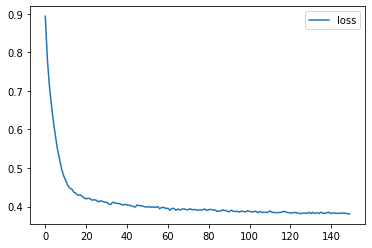

In [ ]:
# Visualize the training history of a model and gain insights into its performance.
pd.DataFrame(history.history).plot()

<h3><font color="green"><b>Observation</b></font></h1>

---

> <p align="justify"> Our objective is to predict the progression of Parkinson's disease over time, as measured by the UPDRS score, using data from clinical assessments and protein measurements. To achieve this, we merged the clinical and protein datasets and developed a model to predict the UPDRS score at time points 0, 6, 12, and 24 months. </p><p align="justify">Our model demonstrated good performance, suggesting that our approach of combining clinical and protein data is effective in predicting disease progression. In future work, we plan to further explore the relationship between different treatments and disease progression by merging all three datasets (clinical, protein, and treatment) and comparing the performance of our model across the different treatments. This will allow us to identify the most effective treatment for Parkinson's disease. </p>


